<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B8_%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ООО "Университет Цифровых Технологий платформа 3"

 # Анализ и обработка данных


## Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

Установим размер графиков по умолчанию (сделаем их крупнее)

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = (12, 6)

%config InlineBackend.figure_format = 'svg' 

## Загрузка данных для анализа

Загрузим данные по автомобилям с сайта drom.ru

! Мы используем загрузку датасетов из своего источника. Рекомендуем вам загружать из него. Однако, если у вас есть свой датасет, можете использовать ячейки ниже, подключить Google Drive, скопировать на него датасет, и не забудьте при загрузке указать свой адрес к файлу датасета, см. занятие по основам Python.

In [ ]:
!wget http://dataudt.ru/datasets/drom.csv

--2021-04-15 05:45:28--  http://dataudt.ru/datasets/drom.csv
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64408805 (61M) [application/octet-stream]
Saving to: ‘drom.csv.1’

drom.csv.1          100%[===================>]  61.42M  13.8MB/s    in 4.4s    

2021-04-15 05:45:33 (13.8 MB/s) - ‘drom.csv.1’ saved [64408805/64408805]



In [ ]:
!ls

drive  drom.csv  drom.csv.1  sample_data


In [ ]:
df = pd.read_csv('/content/drom.csv')
df

,Бренд,Модель,Год,Объём,Топливо,Мощность,Трансмиссия,Привод,Пробег,Комплектация,Город,Цена,Цвет,Руль,Поколение
0,Changan,CS35 Plus,2020,1600.0,бензин,128.0,механика,передний,NaN,NaN,Краснодар,1175000,белый,левый,NaN
1,Changan,CS35 Plus,2020,1600.0,бензин,128.0,механика,передний,NaN,NaN,Краснодар,1175000,коричневый,левый,NaN
2,Changan,CS35 Plus,2020,1600.0,бензин,128.0,автомат,передний,NaN,NaN,Краснодар,1469900,голубой,левый,NaN
3,Changan,CS35 Plus,2020,1600.0,бензин,128.0,автомат,передний,NaN,1.6 AT Luxury,Ставрополь,1469900,серебристый,левый,NaN
4,Changan,CS35 Plus,2020,1600.0,бензин,128.0,автомат,передний,NaN,1.6 AT Luxury,Ставрополь,1469900,белый,левый,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469061,Opel,Astra,2012,1600.0,бензин,NaN,автомат,передний,180000.0,NaN,Новосибирск,450000,серебристый,левый,4.0
469062,Opel,Astra,2012,1600.0,бензин,115.0,механика,передний,86000.0,NaN,Уфа,455000,серебристый,левый,4.0
469063,Opel,Astra,2012,1600.0,бензин,115.0,механика,передний,105811.0,1.6 MT Cosmo,Миасс,575000,черный,левый,4.0
469064,Opel,Astra,2012,1598.0,бензин,NaN,автомат,передний,143661.0,NaN,Ростов-на-Дону,539000,белый,левый,NaN


Вот эти ячейки ниже можно использовать чтобы загрузить данные. Не забудьте изменить путь к файлу. Если не хотите менять путь, нужно предварительно на Google Drive создать папку datasets, и уже в неё скопировать файлы датасетов.


In [ ]:
# подключаем Google Drive - будем скачивать с него, т.к. намного быстрее
# файлы предварительно уже записали на Google Drive
# после запуска переходим по ссылке, которая появится, для идентификации
# копируем оттуда код authorization code и вставляем здесь в окошко
# Вам нужно создать собственные папки, указать собственный путь, какой у Вас к файлам
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Преобразуем в pandas DataFrame:

In [ ]:
# df = pd.read_csv('/content/drive/MyDrive/datasets/drom.csv')
# df

### Действия со столбцами

При необходимости можно переименовать столбцы:

In [ ]:
df.rename(columns={'Объём': 'V,см3'}, inplace=True) # Переименовываем столбец в "V,см3"
df.head(10)

,Бренд,Модель,Год,"V,см3",Топливо,Мощность,Трансмиссия,Привод,Пробег,Комплектация,Город,Цена,Цвет,Руль,Поколение
0,Changan,CS35 Plus,2020,1600.0,бензин,128.0,механика,передний,NaN,NaN,Краснодар,1175000,белый,левый,NaN
1,Changan,CS35 Plus,2020,1600.0,бензин,128.0,механика,передний,NaN,NaN,Краснодар,1175000,коричневый,левый,NaN
2,Changan,CS35 Plus,2020,1600.0,бензин,128.0,автомат,передний,NaN,NaN,Краснодар,1469900,голубой,левый,NaN
3,Changan,CS35 Plus,2020,1600.0,бензин,128.0,автомат,передний,NaN,1.6 AT Luxury,Ставрополь,1469900,серебристый,левый,NaN
4,Changan,CS35 Plus,2020,1600.0,бензин,128.0,автомат,передний,NaN,1.6 AT Luxury,Ставрополь,1469900,белый,левый,NaN
5,Changan,CS35 Plus,2020,1600.0,бензин,128.0,механика,передний,1.0,1.6 MT Luxury,Новый Уренгой,1339900,серый,левый,1.0
6,Changan,CS35 Plus,2020,1600.0,бензин,128.0,автомат,передний,NaN,1.6 AT Luxury,Ставрополь,1469900,белый,левый,NaN
7,Changan,CS75,2020,1800.0,бензин,150.0,автомат,4WD,1000.0,NaN,Новый Уренгой,1769900,серый,левый,1.0
8,Changan,CS35,2016,1600.0,бензин,113.0,автомат,передний,107760.0,NaN,Москва,607000,белый,левый,1.0
9,Changan,CS35 Plus,2020,1600.0,бензин,128.0,автомат,передний,541.0,NaN,Сургут,1469900,белый,левый,1.0


In [ ]:
df.tail(10)

,Бренд,Модель,Год,"V,см3",Топливо,Мощность,Трансмиссия,Привод,Пробег,Комплектация,Город,Цена,Цвет,Руль,Поколение
469056,Opel,Astra,2012,1400.0,бензин,140.0,автомат,передний,106000.0,1.4 Turbo AT Cosmo,Красноуральск,450000,белый,левый,4.0
469057,Opel,Astra,2012,1400.0,бензин,140.0,автомат,передний,106000.0,1.4 Turbo AT Cosmo,Красноуральск,450000,белый,левый,4.0
469058,Opel,Astra,2012,1600.0,бензин,115.0,механика,передний,185000.0,NaN,Ростов-на-Дону,470000,белый,левый,4.0
469059,Opel,Astra,2012,1600.0,бензин,115.0,автомат,передний,86000.0,1.6 AT Cosmo,Москва,600000,серый,левый,4.0
469060,Opel,Astra,2012,1600.0,бензин,115.0,механика,передний,38000.0,NaN,Челябинск,495000,серый,левый,4.0
469061,Opel,Astra,2012,1600.0,бензин,NaN,автомат,передний,180000.0,NaN,Новосибирск,450000,серебристый,левый,4.0
469062,Opel,Astra,2012,1600.0,бензин,115.0,механика,передний,86000.0,NaN,Уфа,455000,серебристый,левый,4.0
469063,Opel,Astra,2012,1600.0,бензин,115.0,механика,передний,105811.0,1.6 MT Cosmo,Миасс,575000,черный,левый,4.0
469064,Opel,Astra,2012,1598.0,бензин,NaN,автомат,передний,143661.0,NaN,Ростов-на-Дону,539000,белый,левый,NaN
469065,Opel,Astra,2012,1600.0,бензин,115.0,автомат,передний,NaN,NaN,Данков,575000,NaN,левый,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469066 entries, 0 to 469065
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Бренд         469066 non-null  object 
 1   Модель        469066 non-null  object 
 2   Год           469066 non-null  int64  
 3   V,см3         457084 non-null  float64
 4   Топливо       448227 non-null  object 
 5   Мощность      452904 non-null  float64
 6   Трансмиссия   460337 non-null  object 
 7   Привод        461661 non-null  object 
 8   Пробег        379254 non-null  float64
 9   Комплектация  228715 non-null  object 
 10  Город         469066 non-null  object 
 11  Цена          469066 non-null  int64  
 12  Цвет          433850 non-null  object 
 13  Руль          469066 non-null  object 
 14  Поколение     396933 non-null  float64
dtypes: float64(4), int64(2), object(9)
memory usage: 53.7+ MB


Столбцы можно поделить по типу данных на 2 вида 

1.   Количественные данные (например мощность, пробег, цена ...)
2.   Категориальные данные (бренд, модель, топливо, цвет ...)

Для категориальных данных бывает полезно пронумеровать категории и заменить текстовые названия на номера соответствующих категорий. В частности, это требуется для обработки данных нейронными сетями.


## Селектирование данных

Часто требуется из всей базы данных выбрать только интересующие нас значения.

Рассмотрим пример: 

Найти все предложения по Лада-Гранта в г. Москва, с пробегом не более 100тыс. км, не старше 2016г. выпуска. Вывести: год, пробег, цвет и цену.

In [ ]:
df1 = df[df.Бренд == 'Лада'][df.Модель == 'Гранта'][df.Город == 'Москва']
df1 = df1[df1.Пробег < 100000.0][df1.Год >= 2016]
df1 = df1[['Год', 'Пробег', 'Цвет', 'Цена']] # выводим только нужные столбцы
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Год,Пробег,Цвет,Цена
408116,2017,45635.0,коричневый,530000
408145,2017,44000.0,серый,434000
408261,2017,73839.0,серый,483000
408286,2017,74000.0,серый,350000
408365,2017,26405.0,синий,415000
408372,2018,34400.0,черный,449000
408607,2017,34617.0,коричневый,390000
408839,2017,83000.0,серебристый,419000
409263,2016,92749.0,белый,340000
409527,2016,12000.0,черный,335000


Метод describe() выводит статистическую сводку по данным - среднее, максимальное, минимальное значения, медианное среднее, среднее отклонение от среднего.

In [ ]:
df1.describe()

,Год,Пробег,Цена
count,25.000000,25.000000,25.000000
mean,2018.000000,45085.920000,437080.000000
std,1.258306,29768.999023,70574.381565
min,2016.000000,2000.000000,335000.000000
25%,2017.000000,23723.000000,382000.000000
50%,2018.000000,44000.000000,434000.000000
75%,2019.000000,73839.000000,479000.000000
max,2020.000000,95000.000000,555000.000000


## Статистические запросы

Так можно сосчитать сколько различных значений встречается в столбце

In [ ]:
df['Бренд'].value_counts()

Toyota     93068
Лада       68901
Nissan     40684
Hyundai    22445
Kia        21818
           ...  
Dadi           2
Soueast        1
Xpeng          1
Daimler        1
Geo            1
Name: Бренд, Length: 113, dtype: int64

Еще пример - по городам:

In [ ]:
df['Город'].value_counts()

Москва          29268
Новосибирск     26487
Владивосток     17175
Красноярск      16540
Омск            15007
                ...  
Ворсма              1
Гагино              1
Клявлино            1
Никольск            1
Сотниковское        1
Name: Город, Length: 2724, dtype: int64

### Графическое представление

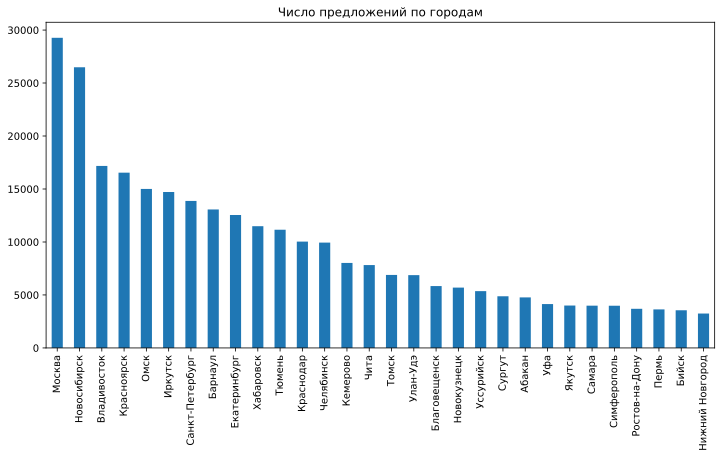

In [ ]:
df['Город'].value_counts().iloc[:30].plot(kind='bar')
plt.title('Число предложений по городам');

Так можно построить диаграмму распространенности брендов (безусловную, по всей базе)

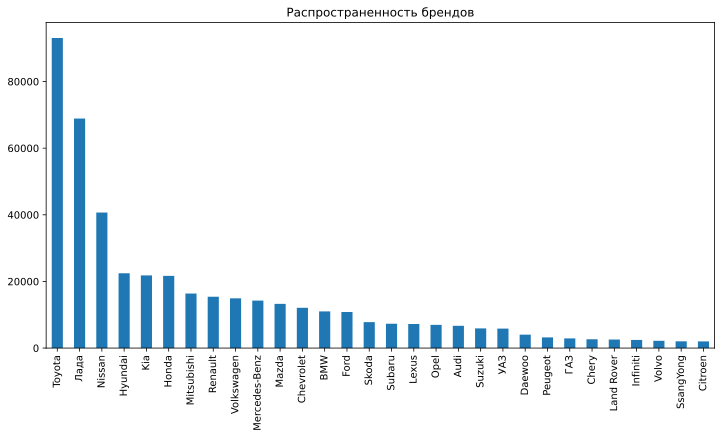

In [ ]:
df['Бренд'].value_counts().iloc[:30].plot(kind='bar')
plt.title('Распространенность брендов');

Но нас могут интересовать условные распределения, например распределение моделей только одного бренда и только в одном городе.

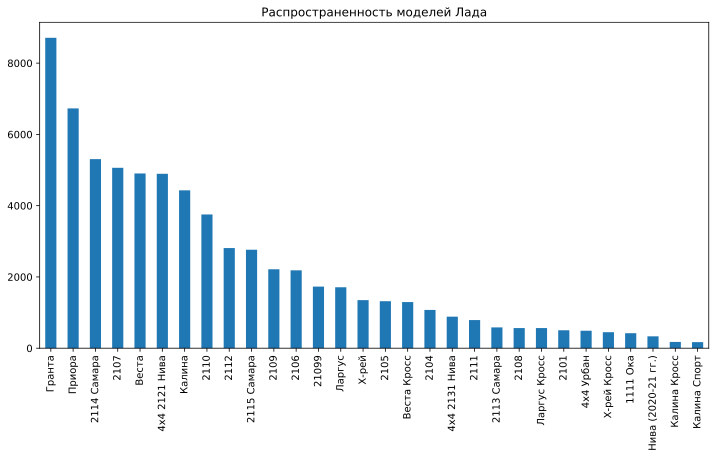

In [ ]:
df[df['Бренд'] == 'Лада']['Модель'].value_counts().iloc[:30].plot(kind='bar')
plt.title('Распространенность моделей Лада');

Статистика по всей базе - только количественные величины

In [ ]:
df.describe()

,Год,"V,см3",Мощность,Пробег,Цена,Поколение
count,469066.000000,457084.000000,452904.000000,379254.000000,4.690660e+05,396933.000000
mean,2008.667646,1978.409914,137.804069,154570.462635,8.075737e+05,2.559115
std,8.377512,763.979866,68.668664,93932.069356,1.159065e+06,2.339426
min,1940.000000,400.000000,1.000000,1.000000,3.790000e+02,1.000000
25%,2003.000000,1600.000000,98.000000,90000.000000,2.500000e+05,1.000000
50%,2010.000000,1700.000000,123.000000,143498.000000,5.000000e+05,2.000000
75%,2015.000000,2000.000000,150.000000,200000.000000,9.080000e+05,3.000000
max,2021.000000,10000.000000,2000.000000,999999.000000,9.006000e+07,15.000000


Сколько строк относится к Москве?

In [ ]:
df[df.Город == 'Москва'].count()

Бренд           29268
Модель          29268
Год             29268
V,см3           29079
Топливо         28482
Мощность        28358
Трансмиссия     28509
Привод          29108
Пробег          15943
Комплектация    16263
Город           29268
Цена            29268
Цвет            28732
Руль            29268
Поколение       14145
dtype: int64

Средняя цена авто по Москве

In [ ]:
df[df.Город == 'Москва'].Цена.mean()

2024313.8351441848

Минимальная, средняя, максимальная цены и количество предложений Лада-Гранты по Москве: 

In [ ]:
df_l = df[df.Бренд == 'Лада']
df_lg = df_l[df_l.Модель == 'Гранта']
df_lgm = df_lg[df_lg.Город == 'Москва']
df_lgm.Цена.min(), df_lgm.Цена.mean(), df_lgm.Цена.max(), df_lgm.Цена.count()

(169000, 539217.3780487805, 701800, 328)

База по Лада-Гранте

In [ ]:
df_lg

,Бренд,Модель,Год,"V,см3",Топливо,Мощность,Трансмиссия,Привод,Пробег,Комплектация,Город,Цена,Цвет,Руль,Поколение
407841,Лада,Гранта,2017,1600.0,бензин,87.0,механика,передний,65000.0,NaN,Улан-Удэ,340000,черный,левый,1.0
407842,Лада,Гранта,2017,1600.0,бензин,98.0,автомат,передний,77000.0,NaN,Краснодар,408000,коричневый,левый,1.0
407845,Лада,Гранта,2017,1600.0,бензин,87.0,механика,передний,30000.0,NaN,Игра,400000,черный,левый,1.0
407847,Лада,Гранта,2017,1600.0,бензин,106.0,автомат,передний,200000.0,NaN,Оренбург,350000,синий,левый,1.0
407848,Лада,Гранта,2017,1600.0,бензин,87.0,механика,передний,50000.0,1.6 MT Comfort,Кемерово,395000,белый,левый,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435681,Лада,Гранта,2012,1600.0,бензин,82.0,механика,передний,77000.0,1.6 MT Стандарт,Курган,265000,бордовый,левый,1.0
435682,Лада,Гранта,2012,1600.0,бензин,82.0,механика,передний,200000.0,1.6 MT Стандарт,Армавир,225000,черный,левый,1.0
435683,Лада,Гранта,2012,1600.0,бензин,87.0,механика,передний,140000.0,NaN,Симферополь,265000,белый,левый,1.0
435684,Лада,Гранта,2012,1600.0,бензин,87.0,механика,передний,82400.0,NaN,Екатеринбург,240000,черный,левый,1.0


### Гистограммы

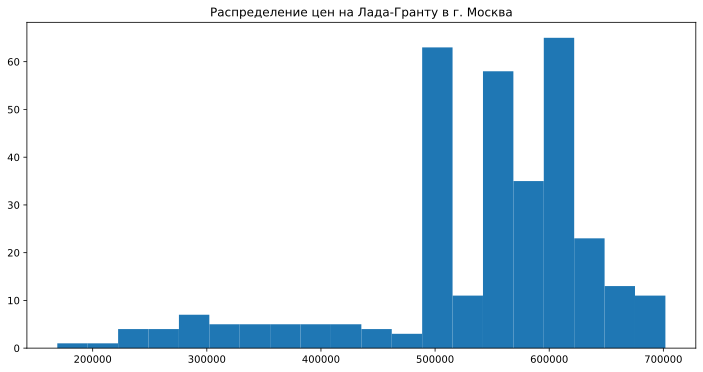

In [ ]:
plt.hist(df_lgm.Цена.values, bins=20);
plt.title('Распределение цен на Лада-Гранту в г. Москва');

Количество предложений Лада по годам

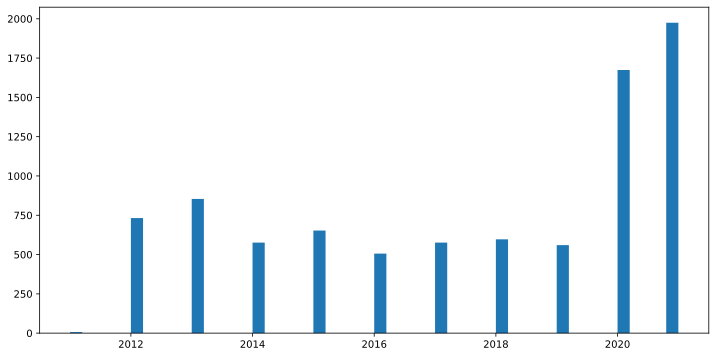

In [ ]:
plt.hist(df_lg.Год.values, bins=50);

Как цена зависит от года выпуска?

Количество предложений Лада (любых моделей) по городам

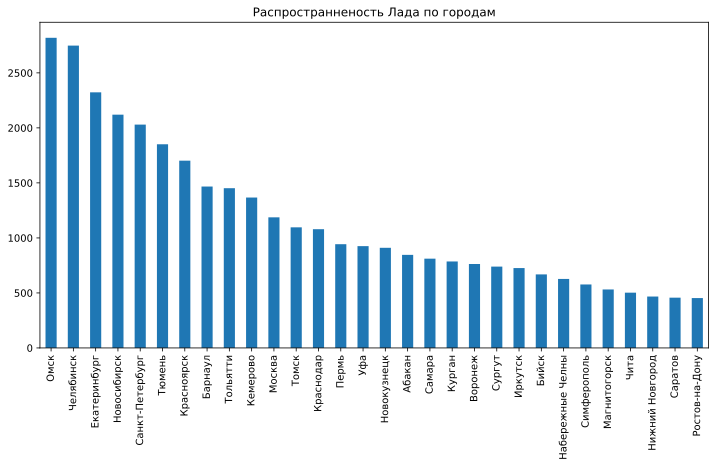

In [ ]:
df[df['Бренд'] == 'Лада']['Город'].value_counts().iloc[:30].plot(kind='bar')
plt.title('Распространненость Лада по городам');

Распространенность только одной модели - Гранта

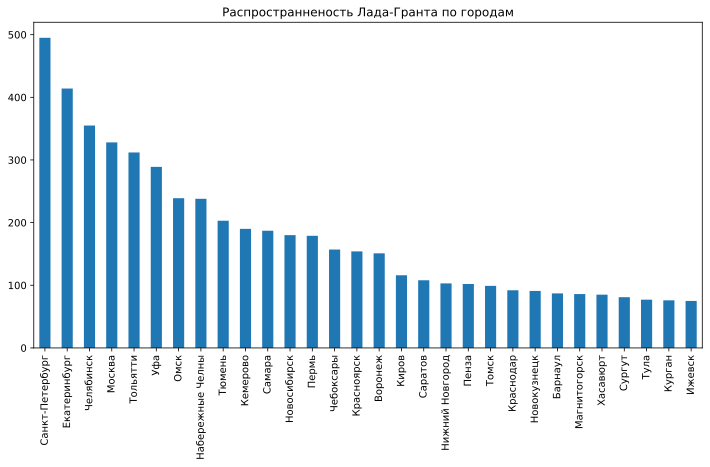

In [ ]:
df_lg['Город'].value_counts().iloc[:30].plot(kind='bar')  # df_lm - Лада Гранта
plt.title('Распространненость Лада-Гранта по городам');

## Обработка отсутствующих данных

Пустые ячейки в CSV файле помечаются как NaN (Not a Number) в pandas DataFrame. 

Могут возникнуть задачи:


1.   Выбросить строки с отсутствующими данными;
2.   Заменить отсутствующие данные на какое-то значение



Выявление пустых значений - isnull() возвращает True если значение столбца отсутствует. 

In [ ]:
df.Цвет.isnull() 

0         False
1         False
2         False
3         False
4         False
          ...  
469061    False
469062    False
469063    False
469064    False
469065     True
Name: Цвет, Length: 469066, dtype: bool

Это можно использовать для селектирования строк с отсутствующей характеристикой, например:

In [ ]:
# выберем все строки, где отсутствуют данные о цвете.
df_nan = df[df.Цвет.isnull()] 
df_nan

,Бренд,Модель,Год,"V,см3",Топливо,Мощность,Трансмиссия,Привод,Пробег,Комплектация,Город,Цена,Цвет,Руль,Поколение
52,Acura,MDX,2007,3700.0,бензин,300.0,автомат,4WD,NaN,NaN,Комсомольск-на-Амуре,880000,NaN,левый,2.0
56,Acura,MDX,2005,3500.0,бензин,265.0,автомат,4WD,229000.0,3.5 AWD AT,Новосибирск,580000,NaN,левый,1.0
60,Changan,CS75,2020,1800.0,бензин,150.0,автомат,4WD,NaN,1.8t AT Comfort,Краснодар,1739900,NaN,левый,NaN
61,Changan,CS55,2020,1500.0,бензин,143.0,механика,передний,NaN,1.5 MT Comfort,Краснодар,1479900,NaN,левый,NaN
64,Changan,CS75,2020,1800.0,бензин,150.0,автомат,4WD,NaN,1.8t AT Luxe,Барнаул,1909900,NaN,левый,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468975,Opel,Astra,2008,1600.0,бензин,116.0,механика,передний,200000.0,NaN,Москва,295000,NaN,левый,3.0
468981,Opel,Astra,2008,1600.0,бензин,115.0,механика,передний,207100.0,NaN,Азов,350000,NaN,левый,3.0
469022,Opel,Astra,2005,1700.0,дизель,100.0,механика,передний,210000.0,NaN,Симферополь,285000,NaN,левый,3.0
469023,Opel,Astra,2005,1800.0,бензин,125.0,автомат,передний,NaN,NaN,Троицк,290000,NaN,левый,3.0


метод notnull() противоположен методу isnull(), его следует использовать если надо оставить только строки с определенным признаком.

In [ ]:
# выберем все строки, где есть данные о цвете.
df_color = df[df.Цвет.notnull()] 
df_color

,Бренд,Модель,Год,"V,см3",Топливо,Мощность,Трансмиссия,Привод,Пробег,Комплектация,Город,Цена,Цвет,Руль,Поколение
0,Changan,CS35 Plus,2020,1600.0,бензин,128.0,механика,передний,NaN,NaN,Краснодар,1175000,белый,левый,NaN
1,Changan,CS35 Plus,2020,1600.0,бензин,128.0,механика,передний,NaN,NaN,Краснодар,1175000,коричневый,левый,NaN
2,Changan,CS35 Plus,2020,1600.0,бензин,128.0,автомат,передний,NaN,NaN,Краснодар,1469900,голубой,левый,NaN
3,Changan,CS35 Plus,2020,1600.0,бензин,128.0,автомат,передний,NaN,1.6 AT Luxury,Ставрополь,1469900,серебристый,левый,NaN
4,Changan,CS35 Plus,2020,1600.0,бензин,128.0,автомат,передний,NaN,1.6 AT Luxury,Ставрополь,1469900,белый,левый,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469060,Opel,Astra,2012,1600.0,бензин,115.0,механика,передний,38000.0,NaN,Челябинск,495000,серый,левый,4.0
469061,Opel,Astra,2012,1600.0,бензин,NaN,автомат,передний,180000.0,NaN,Новосибирск,450000,серебристый,левый,4.0
469062,Opel,Astra,2012,1600.0,бензин,115.0,механика,передний,86000.0,NaN,Уфа,455000,серебристый,левый,4.0
469063,Opel,Astra,2012,1600.0,бензин,115.0,механика,передний,105811.0,1.6 MT Cosmo,Миасс,575000,черный,левый,4.0


Случается, что отсутствующее значение нужно заменить на какое то определенное значение. Например, в нашем случае пробег у машин 2020 года помечен как NaN, скорее всего это новые машины без пробега. Установим таким машинам пробег в 10000.

In [ ]:
# выберем все строки, где отсутствуют данные о пробеге.
df_nan = df[df.Пробег.isnull()]
df_nan = df_nan[df_nan.Год == 2020] 
df_nan

,Бренд,Модель,Год,"V,см3",Топливо,Мощность,Трансмиссия,Привод,Пробег,Комплектация,Город,Цена,Цвет,Руль,Поколение
0,Changan,CS35 Plus,2020,1600.0,бензин,128.0,механика,передний,NaN,NaN,Краснодар,1175000,белый,левый,NaN
1,Changan,CS35 Plus,2020,1600.0,бензин,128.0,механика,передний,NaN,NaN,Краснодар,1175000,коричневый,левый,NaN
2,Changan,CS35 Plus,2020,1600.0,бензин,128.0,автомат,передний,NaN,NaN,Краснодар,1469900,голубой,левый,NaN
3,Changan,CS35 Plus,2020,1600.0,бензин,128.0,автомат,передний,NaN,1.6 AT Luxury,Ставрополь,1469900,серебристый,левый,NaN
4,Changan,CS35 Plus,2020,1600.0,бензин,128.0,автомат,передний,NaN,1.6 AT Luxury,Ставрополь,1469900,белый,левый,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465429,Kia,Sportage,2020,2400.0,бензин,184.0,автомат,4WD,NaN,2.4 AT 4WD GT-Line,Ростов-на-Дону,2304900,белый,левый,NaN
465430,Kia,Sportage,2020,2000.0,бензин,150.0,автомат,передний,NaN,2.0 AT 2WD Luxe+,Москва,1949900,красный,левый,NaN
465431,Kia,Sportage,2020,2000.0,бензин,150.0,автомат,передний,NaN,2.0 AT 2WD Comfort,Нижний Новгород,1799900,коричневый,левый,NaN
465432,Kia,Sportage,2020,2000.0,бензин,150.0,автомат,передний,NaN,NaN,Магнитогорск,1909900,белый,левый,NaN


Заменим NaN на 10000 для машин 2020 года

In [ ]:
df2 = df[df.Год == 2020]
df2 = df2[df2.Пробег.isnull()]
df2.Пробег = 10000.
df2

,Бренд,Модель,Год,"V,см3",Топливо,Мощность,Трансмиссия,Привод,Пробег,Комплектация,Город,Цена,Цвет,Руль,Поколение
0,Changan,CS35 Plus,2020,1600.0,бензин,128.0,механика,передний,10000.0,NaN,Краснодар,1175000,белый,левый,NaN
1,Changan,CS35 Plus,2020,1600.0,бензин,128.0,механика,передний,10000.0,NaN,Краснодар,1175000,коричневый,левый,NaN
2,Changan,CS35 Plus,2020,1600.0,бензин,128.0,автомат,передний,10000.0,NaN,Краснодар,1469900,голубой,левый,NaN
3,Changan,CS35 Plus,2020,1600.0,бензин,128.0,автомат,передний,10000.0,1.6 AT Luxury,Ставрополь,1469900,серебристый,левый,NaN
4,Changan,CS35 Plus,2020,1600.0,бензин,128.0,автомат,передний,10000.0,1.6 AT Luxury,Ставрополь,1469900,белый,левый,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465429,Kia,Sportage,2020,2400.0,бензин,184.0,автомат,4WD,10000.0,2.4 AT 4WD GT-Line,Ростов-на-Дону,2304900,белый,левый,NaN
465430,Kia,Sportage,2020,2000.0,бензин,150.0,автомат,передний,10000.0,2.0 AT 2WD Luxe+,Москва,1949900,красный,левый,NaN
465431,Kia,Sportage,2020,2000.0,бензин,150.0,автомат,передний,10000.0,2.0 AT 2WD Comfort,Нижний Новгород,1799900,коричневый,левый,NaN
465432,Kia,Sportage,2020,2000.0,бензин,150.0,автомат,передний,10000.0,NaN,Магнитогорск,1909900,белый,левый,NaN


## Преобразование категорий
Еще один типовой случай. Мы хотим в столбце 'Город' оставить только 4 категории: Москва, Санкт-Петербург, миллионник, малый город.

Определим функцию city_categories():

In [ ]:
def сity_categories(arg):
    millionCities = "Новосибирск Екатеринбург Нижний Новгород Казань Челябинск Омск Самара Ростов-на-Дону Уфа Красноярск Пермь Воронеж Волгоград"
    item= arg.strip() # Удаляем пробелы
    if item == "Москва":          return "Москва"
    if item == "Санкт-Петербург": return "Санкт-Петербург"
    if item in millionCities:     return 'Миллионник'
    else: return "малый город"

В базе по Ладе-Гранте сгруппируем города в 4 категории.

In [ ]:
df_lg['Город'] = [сity_categories(x) for x in df_lg['Город']]
df_lg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Бренд,Модель,Год,"V,см3",Топливо,Мощность,Трансмиссия,Привод,Пробег,Комплектация,Город,Цена,Цвет,Руль,Поколение
407841,Лада,Гранта,2017,1600.0,бензин,87.0,механика,передний,65000.0,NaN,малый город,340000,черный,левый,1.0
407842,Лада,Гранта,2017,1600.0,бензин,98.0,автомат,передний,77000.0,NaN,малый город,408000,коричневый,левый,1.0
407845,Лада,Гранта,2017,1600.0,бензин,87.0,механика,передний,30000.0,NaN,малый город,400000,черный,левый,1.0
407847,Лада,Гранта,2017,1600.0,бензин,106.0,автомат,передний,200000.0,NaN,малый город,350000,синий,левый,1.0
407848,Лада,Гранта,2017,1600.0,бензин,87.0,механика,передний,50000.0,1.6 MT Comfort,малый город,395000,белый,левый,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435681,Лада,Гранта,2012,1600.0,бензин,82.0,механика,передний,77000.0,1.6 MT Стандарт,малый город,265000,бордовый,левый,1.0
435682,Лада,Гранта,2012,1600.0,бензин,82.0,механика,передний,200000.0,1.6 MT Стандарт,малый город,225000,черный,левый,1.0
435683,Лада,Гранта,2012,1600.0,бензин,87.0,механика,передний,140000.0,NaN,малый город,265000,белый,левый,1.0
435684,Лада,Гранта,2012,1600.0,бензин,87.0,механика,передний,82400.0,NaN,Миллионник,240000,черный,левый,1.0


In [ ]:
def сity_categories_digit(arg):
    millionCities = "Новосибирск Екатеринбург Нижний Новгород Казань Челябинск Омск Самара Ростов-на-Дону Уфа Красноярск Пермь Воронеж Волгоград"
    item= arg.strip() # Удаляем пробелы
    if item == "Москва":          return 0
    if item == "Санкт-Петербург": return 1
    if item in millionCities:     return 2
    else: return 3

В базе по Ладе-Гранте сгруппируем города в 4 категории.

In [ ]:
df_lg['Город'] = [сity_categories_digit(x) for x in df_lg['Город']]
df_lg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Бренд,Модель,Год,"V,см3",Топливо,Мощность,Трансмиссия,Привод,Пробег,Комплектация,Город,Цена,Цвет,Руль,Поколение
407841,Лада,Гранта,2017,1600.0,бензин,87.0,механика,передний,65000.0,NaN,3,340000,черный,левый,1.0
407842,Лада,Гранта,2017,1600.0,бензин,98.0,автомат,передний,77000.0,NaN,3,408000,коричневый,левый,1.0
407845,Лада,Гранта,2017,1600.0,бензин,87.0,механика,передний,30000.0,NaN,3,400000,черный,левый,1.0
407847,Лада,Гранта,2017,1600.0,бензин,106.0,автомат,передний,200000.0,NaN,3,350000,синий,левый,1.0
407848,Лада,Гранта,2017,1600.0,бензин,87.0,механика,передний,50000.0,1.6 MT Comfort,3,395000,белый,левый,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435681,Лада,Гранта,2012,1600.0,бензин,82.0,механика,передний,77000.0,1.6 MT Стандарт,3,265000,бордовый,левый,1.0
435682,Лада,Гранта,2012,1600.0,бензин,82.0,механика,передний,200000.0,1.6 MT Стандарт,3,225000,черный,левый,1.0
435683,Лада,Гранта,2012,1600.0,бензин,87.0,механика,передний,140000.0,NaN,3,265000,белый,левый,1.0
435684,Лада,Гранта,2012,1600.0,бензин,87.0,механика,передний,82400.0,NaN,3,240000,черный,левый,1.0


## Группирование (groupby)

Как зависит цена Лады-Гранты от года выпуска?

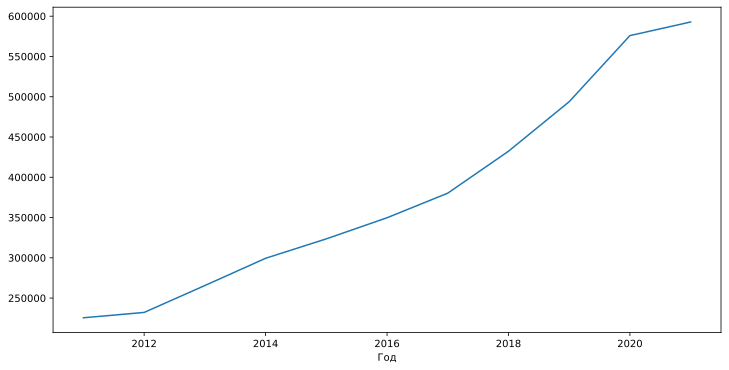

In [ ]:
df_lg.groupby('Год').Цена.mean().plot();

Как зависит цена Лады-Гранты от города?

In [ ]:
data = df_lg.groupby('Город')['Цена'].describe().sort_values(by='mean', ascending=False)
data

,count,mean,std,min,25%,50%,75%,max
Город,,,,,,,,
1,495.0,547591.454545,97071.990692,149000.0,508950.0,559500.0,611500.0,707800.0
0,328.0,539217.378049,99812.089365,169000.0,499900.0,556500.0,597000.0,701800.0
3,7887.0,431054.213896,147946.325891,50000.0,300000.0,420000.0,565500.0,850000.0


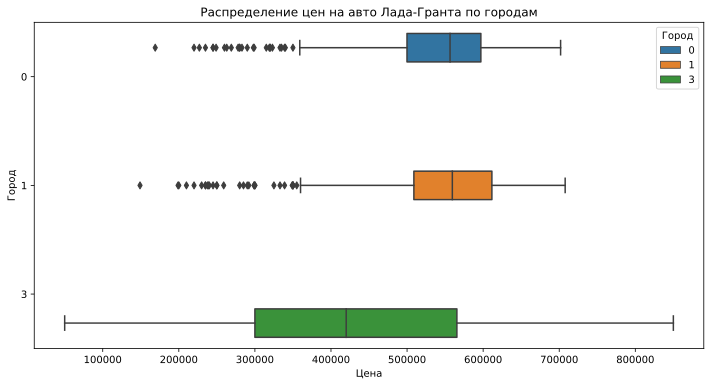

In [ ]:
sns.boxplot(data=df_lg, x='Цена', y='Город', hue='Город', orient='h')
plt.title('Распределение цен на авто Лада-Гранта по городам');

## Визуализация корреляции данных

Для выявления корреляции между двумя величинами можно вывести диаграмму рассеяния (scattering).


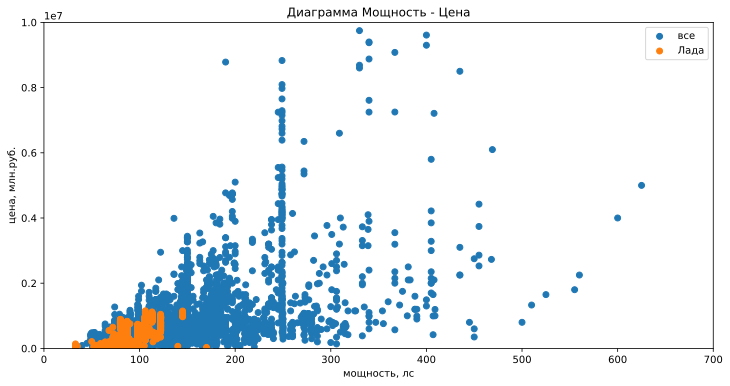

In [ ]:
plt.scatter(df.Мощность.iloc[::100], df.Цена[::100], label='все') # выводим только каждую сотую строку.
plt.scatter(df_l.Мощность[::10], df_l.Цена[::10], label='Лада')
plt.ylabel('цена, млн.руб.')
plt.xlabel('мощность, лс')
plt.ylim(0, 1e7)
plt.xlim(0, 700)
plt.legend()
plt.title('Диаграмма Мощность - Цена');

In [ ]:
df1 = df[['Мощность', 'Цена']][::100] #  берём только каждую сотую строку.
print(df1.shape)
df1.head()

(4691, 2)


,Мощность,Цена
0,128.0,1175000
100,NaN,150000
200,240.0,497000
300,124.0,200000
400,128.0,1085000


In [ ]:
df1 = df1[(df1.Мощность.quantile(q=0.005, interpolation='linear') < df1.Мощность) & (df1.Мощность < df1.Мощность.quantile(q=0.995, interpolation='linear'))] # отсекаем лишние значения ниже квантиля
print(df1.shape)
df1.head()

(4476, 2)


,Мощность,Цена
0,128.0,1175000
200,240.0,497000
300,124.0,200000
400,128.0,1085000
500,128.0,1469900


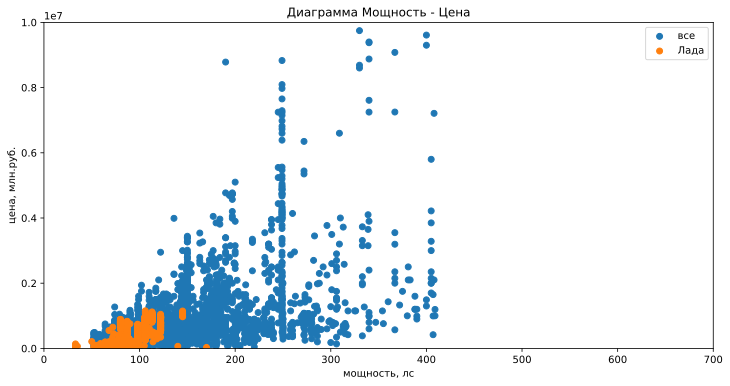

In [ ]:
plt.scatter(df1.Мощность, df1.Цена, label='все') # выводим только каждую сотую строку, выборка ниже квантиля 90%. 
plt.scatter(df_l.Мощность[::10], df_l.Цена[::10], label='Лада')
plt.ylabel('цена, млн.руб.')
plt.xlabel('мощность, лс')
plt.ylim(0, 1e7)
plt.xlim(0, 700)
plt.legend()
plt.title('Диаграмма Мощность - Цена');

Корреляция между большим числом показателей показывается матрицей корреляции. Её можно визуализировать с помощью тепловой карты (heatmap)

In [ ]:
corr = df.corr() # получим матрицу корреляций
corr

,Год,"V,см3",Мощность,Пробег,Цена,Поколение
Год,1.000000,-0.058938,0.114914,-0.544363,0.439890,-0.071626
"V,см3",-0.058938,1.000000,0.795894,0.115796,0.388382,0.189682
Мощность,0.114914,0.795894,1.000000,0.038948,0.539510,0.201772
Пробег,-0.544363,0.115796,0.038948,1.000000,-0.294637,0.120537
Цена,0.439890,0.388382,0.539510,-0.294637,1.000000,0.169057
Поколение,-0.071626,0.189682,0.201772,0.120537,0.169057,1.000000


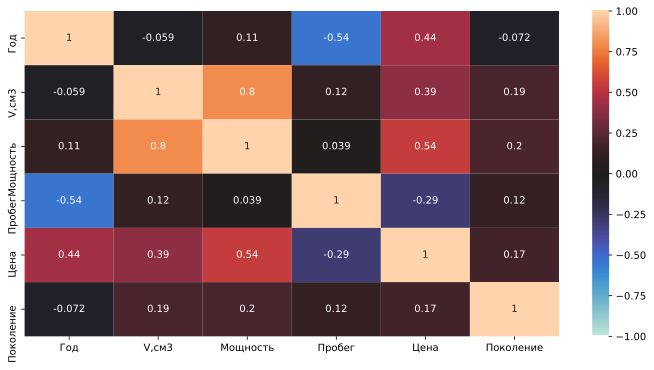

In [ ]:
sns.heatmap(corr, vmin=-1, center=0, annot=True);

# Литература

1. https://python-school.ru/sqlite-database-and-pandas/

2. https://fooobar.com/questions/152438/convert-categorical-data-in-pandas-dataframe

3. https://ru.stackoverflow.com/questions/798664/%D0%9A%D0%B0%D0%BA-%D1%80%D0%B0%D1%81%D0%BF%D0%B0%D1%80%D1%81%D0%B8%D1%82%D1%8C-%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2%D1%8B%D0%B9-%D1%84%D0%B0%D0%B9%D0%BB-%D1%81-%D0%BC%D0%BD%D0%BE%D0%B3%D0%BE%D1%81%D1%82%D1%80%D0%BE%D1%87%D0%BD%D0%BE%D0%B9-%D1%81%D1%82%D1%80%D1%83%D0%BA%D1%82%D1%83%D1%80%D0%BE%D0%B9-%D0%B2-dataframe

4. https://dfedorov.spb.ru/pandas/%D0%A0%D1%83%D0%BA%D0%BE%D0%B2%D0%BE%D0%B4%D1%81%D1%82%D0%B2%D0%BE%20%D0%BF%D0%BE%20%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D1%8E%20%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D1%85%20%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D0%B9%20%D0%B2%20Python.html

5. https://stackoverflow.com/questions/47127388/converting-a-pandas-dataframe-column-into-one-hot-labels

6. https://queirozf.com/entries/one-hot-encoding-a-feature-on-a-pandas-dataframe-an-example

7. https://habr.com/ru/post/456294/

8. https://gist.github.com/ramhiser/982ce339d5f8c9a769a0

9. https://stackoverflow.com/questions/43601217/how-to-convert-a-data-frame-to-one-hot-encoded

10. https://dev-gang.ru/article/kak-perebirat-stroki-v-freime-dannyh-pandas-6kv1i4ayi8/

11. https://www.machinelearningmastery.ru/python-data-preprocessing-using-pandas-dataframe-spark-dataframe-and-koalas-dataframe-e44c42258a8f/

12. https://khashtamov.com/ru/pandas-introduction/



# The End 
